In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [193]:
df = pd.read_csv(r"C:\Users\gulaam01\Downloads\Flask\test\Flask\patient_data.csv") 
df.head()

C    Age History Patient TakeMedication Severity BreathShortness  \
0    Male  18-34     Yes      No             No     Mild              No   
1  Female  18-34     Yes      No             No     Mild              No   
2    Male  35-50     Yes      No             No     Mild              No   
3  Female  35-50     Yes      No             No     Mild              No   
4    Male  51-64     Yes      No             No     Mild              No   

  VisualChanges NoseBleeding Whendiagnoused   Systolic Diastolic  \
0            No          No         <1 Year  111 - 120   81 - 90   
1            No          No         <1 Year  111 - 120   81 - 90   
2            No          No         <1 Year  111 - 120   81 - 90   
3            No          No         <1 Year  111 - 120   81 - 90   
4            No          No         <1 Year  111 - 120   81 - 90   

  ControlledDiet                  Stages  
0             No  HYPERTENSION (Stage-1)  
1             No  HYPERTENSION (Stage-1)  
2             No  HYPERTENSION (Stage-1)  
3             No  HYPERTENSION (Stage-1)  
4             No  HYPERTENSION (Stage-1)

In [194]:
df.rename(columns={'C': 'Gender'}, inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [196]:
df. shape

(1825, 14)

In [197]:
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [198]:
from sklearn.preprocessing import LabelEncoder

columns = ['Gender','Severity','History','Patient','TakeMedication','BreathShortness',
           'VisualChanges','NoseBleeding','ControlledDiet','Stages']


label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])



In [199]:
# Replace incorrect labels with correct ones
df['Stages'] = df['Stages'].replace({
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (STAGE-2)',
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
})


print(df['Stages'].unique())


[0 1 4 2 3 5]


In [200]:
print(df['Stages'].unique())


[0 1 4 2 3 5]


In [201]:
df['Stages']

0       0
1       0
2       0
3       0
4       0
       ..
1820    5
1821    5
1822    5
1823    5
1824    5
Name: Stages, Length: 1825, dtype: int32

In [202]:
df.describe()

Gender      History      Patient  TakeMedication     Severity  \
count  1825.000000  1825.000000  1825.000000     1825.000000  1825.000000   
mean      0.499726     0.907945     0.460822        0.921096     1.013151   
std       0.500137     0.289183     0.498599        0.854759     0.786287   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       0.000000     1.000000     0.000000        0.000000     0.000000   
50%       0.000000     1.000000     0.000000        1.000000     1.000000   
75%       1.000000     1.000000     1.000000        2.000000     2.000000   
max       1.000000     1.000000     1.000000        2.000000     2.000000   

       BreathShortness  VisualChanges  NoseBleeding  ControlledDiet  \
count      1825.000000    1825.000000   1825.000000     1825.000000   
mean          0.465205       0.484932      1.026849        0.460822   
std           0.498925       0.499910      0.678493        0.498599   
min           0.000000       0.000000      0.000000        0.000000   
25%           0.000000       0.000000      1.000000        0.000000   
50%           0.000000       0.000000      1.000000        0.000000   
75%           1.000000       1.000000      1.000000        1.000000   
max           1.000000       1.000000      2.000000        1.000000   

            Stages  
count  1825.000000  
mean      1.777534  
std       1.970962  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       4.000000  
max       5.000000

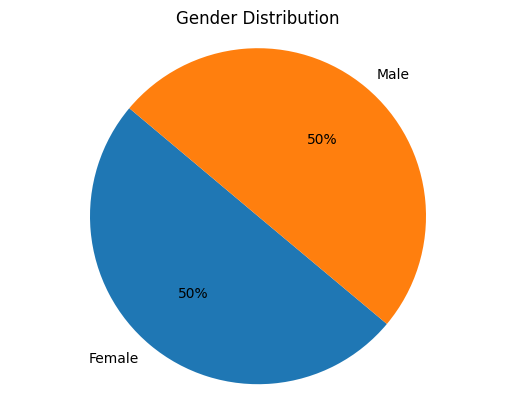

In [203]:
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'})
gender_counts_ = df['Gender'].value_counts()
plt.pie(gender_counts_, labels=gender_counts_.index, autopct='%1.0f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


In [204]:
frequency = df['Stages'].value_counts()
plt.figure(figsize=(6,6))
frequency.plot(kind='bar')
plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('Count of stages')
plt.show()

In [205]:
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [206]:
# Step 1: Convert ranges to midpoints
def range_to_midpoint(x):
    try:
        parts = x.replace(' ', '').split('-')
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return None

# Apply to each column
df['Age_num'] = df['Age'].apply(range_to_midpoint)
df['Systolic_num'] = df['Systolic'].apply(range_to_midpoint)
df['Diastolic_num'] = df['Diastolic'].apply(range_to_midpoint)

# Step 2: Drop rows with missing numeric values (if any)
plot_df = df[['Age_num', 'Systolic_num', 'Diastolic_num']].dropna()

# Step 3: Plot
sns.pairplot(plot_df)
plt.show()


In [207]:
X=df.drop('Stages',axis = 1)
X

Gender    Age  History  Patient  TakeMedication  Severity  \
0       Male  18-34        1        0               0         0   
1     Female  18-34        1        0               0         0   
2       Male  35-50        1        0               0         0   
3     Female  35-50        1        0               0         0   
4       Male  51-64        1        0               0         0   
...      ...    ...      ...      ...             ...       ...   
1820  Female  35-50        1        0               0         2   
1821    Male  51-64        1        0               0         2   
1822  Female  51-64        1        0               0         2   
1823    Male    65+        1        0               0         2   
1824  Female    65+        1        0               0         2   

      BreathShortness  VisualChanges  NoseBleeding Whendiagnoused   Systolic  \
0                   0              0             1        <1 Year  111 - 120   
1                   0              0             1        <1 Year  111 - 120   
2                   0              0             1        <1 Year  111 - 120   
3                   0              0             1        <1 Year  111 - 120   
4                   0              0             1        <1 Year  111 - 120   
...               ...            ...           ...            ...        ...   
1820                0              0             1       >5 Years  111 - 120   
1821                0              0             1       >5 Years  111 - 120   
1822                0              0             1       >5 Years  111 - 120   
1823                0              0             1       >5 Years  111 - 120   
1824                0              0             1       >5 Years  111 - 120   

     Diastolic  ControlledDiet  Age_num  Systolic_num  Diastolic_num  
0      81 - 90               0     26.0         115.5           85.5  
1      81 - 90               0     26.0         115.5           85.5  
2      81 - 90               0     42.5         115.5           85.5  
3      81 - 90               0     42.5         115.5           85.5  
4      81 - 90               0     57.5         115.5           85.5  
...        ...             ...      ...           ...            ...  
1820   70 - 80               0     42.5         115.5           75.0  
1821   70 - 80               0     57.5         115.5           75.0  
1822   70 - 80               0     57.5         115.5           75.0  
1823   70 - 80               0      NaN         115.5           75.0  
1824   70 - 80               0      NaN         115.5           75.0  

[1825 rows x 16 columns]

In [208]:
Y = df['Stages']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1820    5
1821    5
1822    5
1823    5
1824    5
Name: Stages, Length: 1825, dtype: int32

In [209]:
x = np.random.rand(100, 4)  # 100 samples, 4 features
y = np.random.randint(0, 2, 100)  # Binary target variable
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)
acc_lrg = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)
print('Accuracy Score:',acc_lrg)
print(c_lr)

Accuracy Score: 0.4
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.50      0.50      0.50        12

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20



In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

y_pred = linear_regression.predict(x_test)
y_pred_cls = (y_pred >= 0.5).astype(int)

y_true = np.asarray(y_test).astype(int)
print('Accuracy (LinearRegression, threshold 0.5):', accuracy_score(y_true, y_pred_cls))
print(classification_report(y_true, y_pred_cls))

Accuracy (LinearRegression, threshold 0.5): 0.4
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.50      0.50      0.50        12

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20



In [212]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
y_pred = decision_tree_model.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)
print('Accuracy Score:',acc_dt)
print(c_dt)

Accuracy Score: 0.45
              precision    recall  f1-score   support

           0       0.29      0.25      0.27         8
           1       0.54      0.58      0.56        12

    accuracy                           0.45        20
   macro avg       0.41      0.42      0.41        20
weighted avg       0.44      0.45      0.44        20



In [213]:
from sklearn.naive_bayes import MultinomialNB 

mNB = MultinomialNB()
mNB.fit(x_train,y_train)
y_pred = mNB.predict(x_test)

acc_mnb = accuracy_score(y_test,y_pred)
c_mnb = classification_report(y_test,y_pred ,zero_division=0 )

print('Accuracy Score:',acc_mnb)
print(c_mnb)

Accuracy Score: 0.45
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



In [214]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred )

print('Accuracy Score:',acc_nb)
print(c_nb)

Accuracy Score: 0.45
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



In [215]:
from sklearn.ensemble import RandomForestClassifier  # Corrected import: removed space and changed from naive_bayes to ensemble

random_forest_classifier = RandomForestClassifier()  # Corrected class name: removed space
random_forest_classifier.fit(x_train, y_train)
y_pred = random_forest_classifier.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred, zero_division=0)

print('Accuracy Score:', acc_rf)
print(c_rf)

Accuracy Score: 0.4
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.50      0.50      0.50        12

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20



In [216]:
from sklearn.naive_bayes import MultinomialNB 

mNB = MultinomialNB()
mNB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

acc_mnb = accuracy_score(y_test,y_pred)
c_mnb = classification_report(y_test,y_pred ,zero_division=0 )

print('Accuracy Score:',acc_mnb)
print(c_mnb)

Accuracy Score: 0.45
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



In [217]:
prediction = logistic_regression.predict([[0, 3, 0, 2]])
print(prediction)

[0]


In [218]:
prediction[0]

0

In [219]:
model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'RandomForest Classifier',
              'GaussianNB Naive Bayes', 'MultinomialNB Naive Bayes'],
    'Score': [acc_lrg, acc_dt, acc_rf, acc_nb, acc_mnb]
})


In [220]:
model

Model  Score
0        Logistic Regression   0.40
1   Decision Tree Classifier   0.45
2    RandomForest Classifier   0.40
3     GaussianNB Naive Bayes   0.45
4  MultinomialNB Naive Bayes   0.45

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred )

print('Accuracy Score:',acc_nb)
print(c_nb)

Accuracy Score: 0.45
              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



In [221]:
import pickle

# Train your model
model = GaussianNB()
model.fit(x_train, y_train)  # Make sure X_train and y_train are defined

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
